,G_ID,T_ID,VS_T_ID,HEADER_NO,TB_SC,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,ERR,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN,rate
GDAY_DS,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-03-24,20180324LTSK0,LT,SK,0,T,39,33,3,5,7,2,0,0,2,0,0,0,6,0,0,12,0,2,7,0.2,10,2,0.212121
2018-03-25,20180325LTSK0,LT,SK,0,T,33,32,0,0,5,1,0,0,0,0,0,0,1,0,0,9,1,0,6,0.0,2,0,0.156250
2018-03-27,20180327LTOB0,LT,OB,0,T,31,29,0,0,3,0,0,0,0,0,0,0,2,0,0,11,1,0,4,0.0,3,0,0.103448
2018-03-28,20180328LTOB0,LT,OB,0,T,42,36,5,5,10,4,1,0,0,0,1,0,4,0,1,9,1,2,10,0.2,15,3,0.277778
2018-03-29,20180329LTOB0,LT,OB,0,T,36,32,1,1,4,0,0,1,0,0,0,0,4,0,0,8,0,1,8,0.0,3,0,0.156250


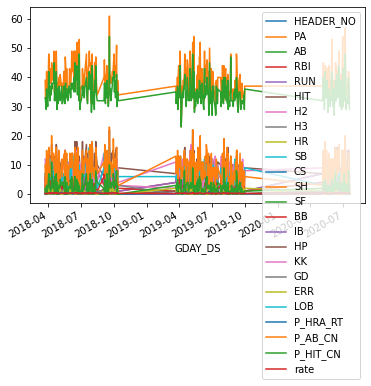

In [322]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd

from datetime import datetime



# data = pd.read_csv("팀타자_통합.csv")
# 합친거로 이름바꾸고
data = pd.read_csv("팀타자_통합.csv",parse_dates=['GDAY_DS'])

# 타율 
data['rate'] = (data['HIT'].values+data['HR'].values)/data['AB'].values



OB = data[data['T_ID']=='OB']
HH = data[data['T_ID']=='HH']
HT = data[data['T_ID']=='HT']
KT = data[data['T_ID']=='KT']
LG = data[data['T_ID']=='LG']
LT = data[data['T_ID']=='LT']
NC = data[data['T_ID']=='NC']
SK = data[data['T_ID']=='SK']
SS = data[data['T_ID']=='SS']
WO= data[data['T_ID']=='WO']
#총잔여
27
25
26
27
25
26
25
26
25
26

#data = data[(data['T_ID']=='OB') ]
#data = data[(data['T_ID']=='HH') ]
#data = data[(data['T_ID']=='HT') ]
#data = data[(data['T_ID']=='KT') ]
#data = data[(data['T_ID']=='LG') ]
data = data[(data['T_ID']=='LT') ]
#data = data[(data['T_ID']=='NC') ]
#data = data[(data['T_ID']=='SK') ]
#data = data[(data['T_ID']=='SS') ]
#data = data[(data['T_ID']=='WO') ]


# 팀별로 하려면 데이터 이름만 data(전체)-> OB
data = data.set_index('GDAY_DS')
# plt.figure(figsize=(50,50))
data.plot()
data.head()

26
                rate
GDAY_DS             
2018-03-24  0.212121
2018-03-25  0.156250
2018-03-27  0.103448
2018-03-28  0.277778
2018-03-29  0.156250
...              ...
2020-06-12  0.250000
2020-06-13  0.264706
2020-06-14  0.414634
2020-06-16  0.314286
2020-06-17  0.303030

[325 rows x 1 columns]


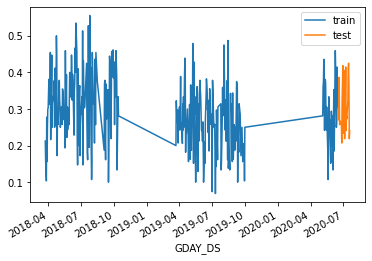

In [325]:
# 날짜 자르기(기준은 마음대로) 'rate'를 함

#각 팀마다 잔여경기 수 만큼 date 설정
split_date = pd.Timestamp('06-17-2020')
train = data.loc[:split_date, ['rate']]
test = data.loc[split_date:, ['rate']]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train','test'])
print(len(test))
print(train)

In [326]:
train2 = list(np.array(train['rate']))
test2 = list(np.array(test['rate']))
train3 = []
for i in train2:
    a =[]
    a.append(i)
    train3.append(a)
    
test3 = []
for i in test2:
    a =[]
    a.append(i)
    test3.append(a)

In [327]:
# win rate 이름 바꾸기(마음대로)
train_sc_df = pd.DataFrame(train3, columns=['win_rate'], index=train.index) 
test_sc_df = pd.DataFrame(test3, columns=['win_rate'], index=test.index) 
train_sc_df.head() 
train_sc_df.shape[0]

325

In [328]:

for s in range(1,7): 
    train_sc_df['shift_{}'.format(s)] = train_sc_df['win_rate'].shift(s) 
    test_sc_df['shift_{}'.format(s)] = test_sc_df['win_rate'].shift(s)
train_sc_df.head(7)

,win_rate,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6
GDAY_DS,,,,,,,
2018-03-24,0.212121,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-25,0.156250,0.212121,NaN,NaN,NaN,NaN,NaN
2018-03-27,0.103448,0.156250,0.212121,NaN,NaN,NaN,NaN
2018-03-28,0.277778,0.103448,0.156250,0.212121,NaN,NaN,NaN
2018-03-29,0.156250,0.277778,0.103448,0.156250,0.212121,NaN,NaN
2018-03-30,0.250000,0.156250,0.277778,0.103448,0.156250,0.212121,NaN
2018-03-31,0.300000,0.250000,0.156250,0.277778,0.103448,0.156250,0.212121


In [329]:
X_train = train_sc_df.dropna().drop('win_rate', axis=1)
y_train = train_sc_df.dropna()[['win_rate']]

X_test = test_sc_df.dropna().drop('win_rate', axis=1)
y_test = test_sc_df.dropna()[['win_rate']]

print(type(X_train)) 
X_train = X_train.values 
print(type(X_train)) 
X_test= X_test.values
y_train = y_train.values 
y_test = y_test.values 

print(y_train.shape)
print(X_train)
print(X_train.shape) 
print(y_train.shape) 


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(319, 1)
[[0.25       0.15625    0.27777778 0.10344828 0.15625    0.21212121]
 [0.3        0.25       0.15625    0.27777778 0.10344828 0.15625   ]
 [0.3030303  0.3        0.25       0.15625    0.27777778 0.10344828]
 ...
 [0.26470588 0.25       0.3125     0.41025641 0.45945946 0.29032258]
 [0.41463415 0.26470588 0.25       0.3125     0.41025641 0.45945946]
 [0.31428571 0.41463415 0.26470588 0.25       0.3125     0.41025641]]
(319, 6)
(319, 1)


In [330]:
# 9,1은 위에 결과값 X_train.shape[1] ,Y_train.shape[1]
print(X_train.shape[0])
X_train_t = X_train.reshape(X_train.shape[0], 6, 1) 
X_test_t = X_test.reshape(X_test.shape[0], 6, 1) 
 
print("최종 DATA") 
print(X_train_t.shape) 
# print(X_train_t) 
# print(y_train) 


319
최종 DATA
(319, 6, 1)


In [331]:
from keras.layers import LSTM  
from keras.models import Sequential  
from keras.layers import Dense  
import keras.backend as K  
from keras.callbacks import EarlyStopping 

 
K.clear_session() 
      
model = Sequential() # Sequeatial Model  
model.add(LSTM(20, input_shape=(6, 1))) # (timestep, feature)  
model.add(Dense(1)) # output = 1  1  
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.summary() 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20)                1760      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [332]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1) 

 
model.fit(X_train_t, y_train, epochs=100, 
          batch_size=30, verbose=1, callbacks=[early_stop]) 


Epoch 1/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0832 - accuracy: 0.0000e+00
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0339 - accuracy: 0.0000e+00
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0118 - accuracy: 0.0000e+00
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0089 - accuracy: 0.0000e+00
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0093 - accuracy: 0.0000e+00
Epoch 00005: early stopping


In [333]:
accuracy = model.evaluate(X_test_t,y_test)
print(accuracy) # 정확도

1/1 [==============================] - 0s 7ms/step - loss: 0.0058 - accuracy: 0.0000e+00
[0.005846747197210789, 0.0]


In [334]:
import numpy as np
prediction = model.predict(X_test_t)
pre=prediction.flatten()

pre


array([0.31323862, 0.3095173 , 0.30242708, 0.29920703, 0.306237  ,
       0.305782  , 0.30988726, 0.31171575, 0.320998  , 0.3137258 ,
       0.31170228, 0.3217255 , 0.31749195, 0.31594574, 0.31023383,
       0.31330317, 0.31731033, 0.3225314 , 0.33121327, 0.3275836 ],
      dtype=float32)

In [336]:
import csv
f = open('잔여경기 (1).csv','r',encoding='UTF-8')
rdr = csv.reader(f)
lines = []
num=0
for line in rdr:
    if line[0] == "롯데":
      line[2] = pre[num]
      num = num+1
    lines.append(line)
f.close()

f = open('잔여경기 (1).csv','w',encoding='UTF-8',newline='') #원본을 훼손할 위험이 있으니 다른 파일에 저장하는 것을 추천합니다.
wr = csv.writer(f)
wr.writerows(lines)

f.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [135]:
import numpy as np
df=pd.DataFrame(prediction)
df.to_csv('타율.csv',index=False)

In [133]:
prediction = model.predict(X_test_t)
a=sum(prediction)/len(prediction)
print(a)

# 하나하나를 그 폴더에 넣으면 되요 근데 그 자동으로 파일에 넣는 코드를 만들어야 될듯 민정아 너 믿는다
#  노가다는 너무 힘들어서 그 코드 알아서 짜서 공유좀**(사실 나도 못해서 코드 점)

[0.30014077]


In [14]:

#총잔여
# 27  OB  [0.34040606]
# 25 HH  [0.27635917]
# 26HT [0.29584846]
# 27KT [0.33733985]
# 25LG [0.31235912]
# 26LT [0.2962948]
# 25NC [0.31340325]
# 26SK [0.28326464]
# 25SS [0.323929]
# 26WO [0.30014077]